In [275]:
import pandas as pd 
import numpy as np
from icecream import ic
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# import models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso




In [253]:
washington_path = '/Users/amine/Desktop/Datathon BCG X/comptages-routiers-permanents_champs.csv'
sts_path = '/Users/amine/Desktop/Datathon BCG X/comptages-routiers-permanents_saints_peres.csv'
convention_path = '/Users/amine/Desktop/Datathon BCG X/comptages-routiers-permanents_convention.csv'

# Washington - Champs Elysées 

In [254]:
washington_df = pd.read_csv(washington_path, sep=';')
washington_df.head()

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4264,AV_Champs_Elysees,2023-02-01T23:00:00+01:00,764.0,11.28000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
1,4264,AV_Champs_Elysees,2023-02-01T22:00:00+01:00,819.0,16.52056,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
2,4264,AV_Champs_Elysees,2023-02-01T20:00:00+01:00,1082.0,19.98722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
3,4264,AV_Champs_Elysees,2023-02-01T18:00:00+01:00,1027.0,23.27334,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
4,4264,AV_Champs_Elysees,2022-12-07T00:00:00+01:00,528.0,68.14334,Bloqué,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605, 2.3017227924560624","{""coordinates"": [[2.300995147533877, 48.871777..."


In [255]:
washington_df.columns

Index(['Identifiant arc', 'Libelle', 'Date et heure de comptage',
       'Débit horaire', 'Taux d'occupation', 'Etat trafic',
       'Identifiant noeud amont', 'Libelle noeud amont',
       'Identifiant noeud aval', 'Libelle noeud aval', 'Etat arc',
       'Date debut dispo data', 'Date fin dispo data', 'geo_point_2d',
       'geo_shape'],
      dtype='object')

In [256]:
washington_df.shape

(9314, 15)

In [257]:
for col in washington_df.columns:
    ic(washington_df[col].value_counts())

ic| washington_df[col].value_counts(): 4264    9314
                                       Name: Identifiant arc, dtype: int64
ic| washington_df[col].value_counts(): AV_Champs_Elysees    9314
                                       Name: Libelle, dtype: int64
ic| washington_df[col].value_counts(): 2023-08-01T02:00:00+02:00    1
                                       2023-02-01T23:00:00+01:00    1
                                       2023-08-31T07:00:00+02:00    1
                                       2023-08-31T05:00:00+02:00    1
                                       2023-08-31T03:00:00+02:00    1
                                                                   ..
                                       2022-12-06T23:00:00+01:00    1
                                       2022-12-06T21:00:00+01:00    1
                                       2022-12-06T19:00:00+01:00    1
                                       2022-12-06T17:00:00+01:00    1
                                       20

In [258]:
washington_df.drop(columns=['Identifiant arc', 'Identifiant noeud amont', 'Libelle noeud amont','Identifiant noeud aval', 'Libelle noeud aval'], inplace=True)

In [259]:
washington_df.columns

Index(['Libelle', 'Date et heure de comptage', 'Débit horaire',
       'Taux d'occupation', 'Etat trafic', 'Etat arc', 'Date debut dispo data',
       'Date fin dispo data', 'geo_point_2d', 'geo_shape'],
      dtype='object')

In [260]:
washington_df.rename(columns={'Libelle':'id', 'Date et heure de comptage':'timestamp', 'Débit horaire':'debit_horaire', "Taux d'occupation":'taux_occupation', 'Etat trafic':'etat_trafic', 'Etat arc':'etat_arc'}, inplace=True)

In [261]:
washington_df.sort_values(by='timestamp', inplace=True)

In [262]:
washington_df['debit_horaire'].head()

2399    672.0
2398    513.0
2397    494.0
2866    513.0
2396    484.0
Name: debit_horaire, dtype: float64

In [263]:
washington_df['taux_occupation'].head()

2399    8.89223
2398    7.12889
2397    6.22500
2866    5.80723
2396    5.57111
Name: taux_occupation, dtype: float64

In [264]:
washington_df['timestamp'].apply(type).value_counts()

<class 'str'>    9314
Name: timestamp, dtype: int64

In [265]:
washington_df['timestamp'] = pd.to_datetime(washington_df['timestamp'], utc = True)

In [266]:
washington_df['year'] = washington_df['timestamp'].dt.year
washington_df['month'] = washington_df['timestamp'].dt.month
washington_df['day'] = washington_df['timestamp'].dt.day
washington_df['hour'] = washington_df['timestamp'].dt.hour
washington_df['weekday'] = washington_df['timestamp'].dt.weekday


/var/folders/k9/5lw2xpwn20v_5c2xxrljc9vw0000gn/T/ipykernel_1313/3286985069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = washington_df.corr()


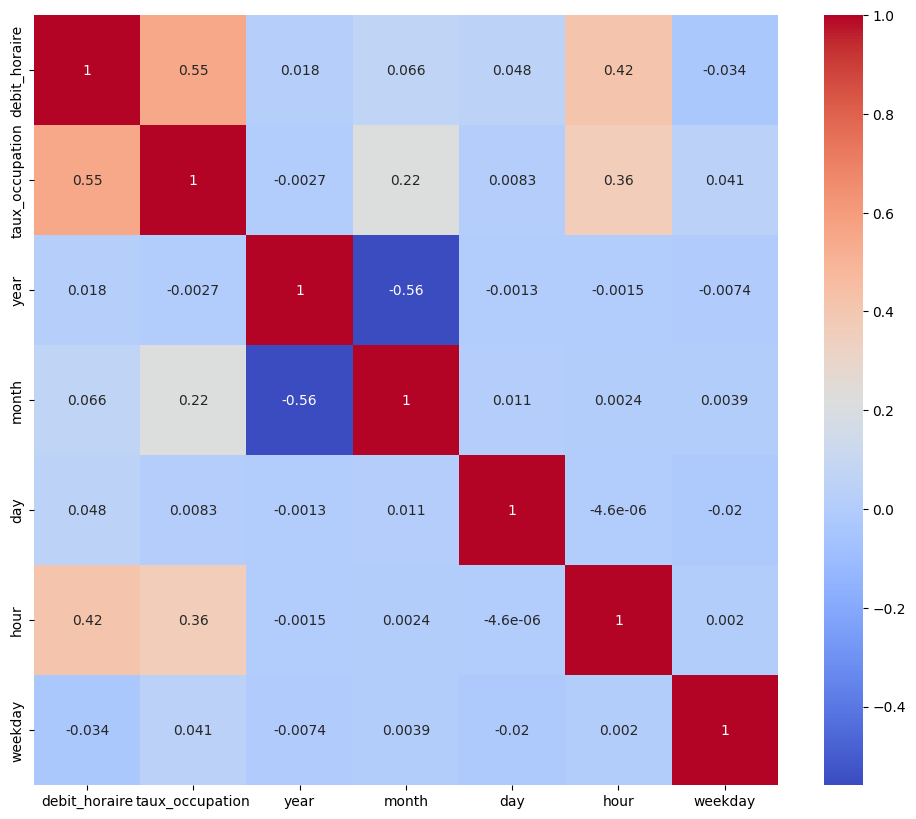

In [267]:
plt.figure(figsize=(12, 10))
cm = washington_df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

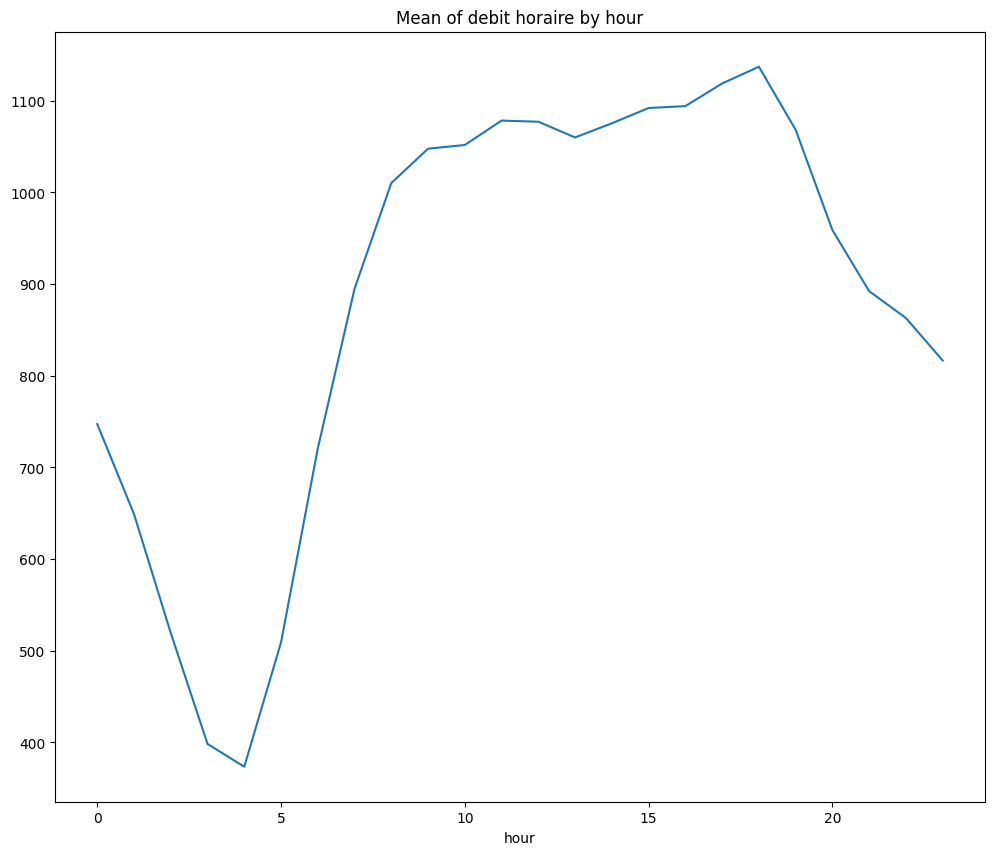

In [268]:
# mean of debit horaire by hour
plt.figure(figsize=(12, 10))
washington_df.groupby('hour')['debit_horaire'].mean().plot()
plt.title('Mean of debit horaire by hour')
plt.show()

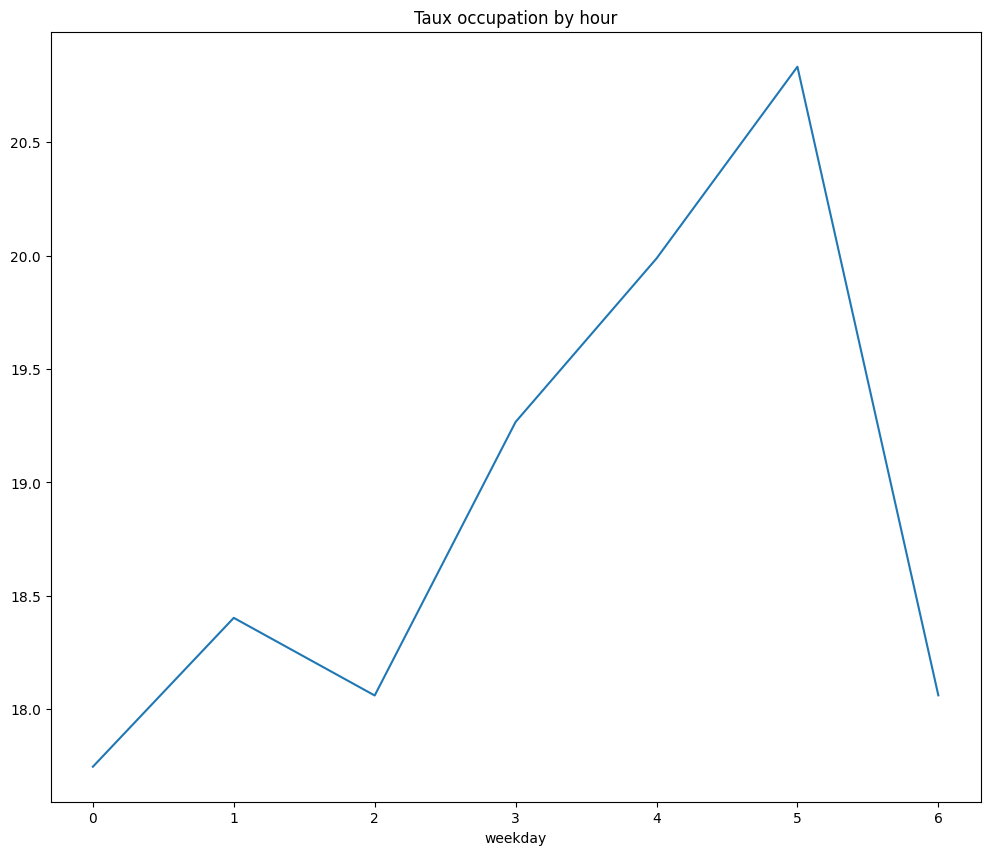

In [269]:
# taux_occupation by hour 
plt.figure(figsize=(12, 10))
washington_df.groupby('weekday')['taux_occupation'].mean().plot()
plt.title('Taux occupation by hour')
plt.show()


In [270]:
washington_df.columns

Index(['id', 'timestamp', 'debit_horaire', 'taux_occupation', 'etat_trafic',
       'etat_arc', 'Date debut dispo data', 'Date fin dispo data',
       'geo_point_2d', 'geo_shape', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [271]:
features = ['etat_trafic', 'etat_arc', 'year', 'month', 'day', 'hour', 'weekday']
target = 'debit_horaire'

# drop rows with missing target values
washington_df.dropna(subset=[target], inplace=True)

# select categorical features
X = washington_df[features]
y = washington_df[target]

cateforical_features = []
for col in X.columns:
    if X[col].dtype == 'object':
        cateforical_features.append(col)

numerical_features = list(set(X.columns) - set(cateforical_features))
# normalize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

/var/folders/k9/5lw2xpwn20v_5c2xxrljc9vw0000gn/T/ipykernel_1313/2487925938.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [272]:
# One hot encoding for categorical features
X = pd.get_dummies(X, columns=cateforical_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse_test}')

rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(f'Linear Regression RMSE: {rmse_train}')


Linear Regression RMSE: 215.9968791000186
Linear Regression RMSE: 227.5313594023835


In [278]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Random Forest RMSE: {rmse_test }')

rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(f'Random Forest RMSE: {rmse_train}')


Random Forest RMSE: 110.54665012828582
Random Forest RMSE: 42.139355837564295
